# **COVID-19 Data Visualization**



> Data taken from https://github.com/CSSEGISandData/COVID-19



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
import math
import time
import datetime
%matplotlib inline

# **Pre-processing of COVID-19 data**

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [ ]:
# Head of confirmed df
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805


In [ ]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017,27347,27653,27971,28281,28587,28874,29142,29369,29587,29886,30157,30436,30717,30978,31244,31493,31746,32006
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,803,803,803,804,806,807,807,807,821,825,825,828,839,839,839,839,839,855,858,863,863,863,869,869,875,875,875,875,875,877,877,893,893,902,902,902,908,908,909,909
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,242,242,266,301,395,437,460,461,476,503,506,520,544,564,567,569,575,577,577,584,628,628,632,667,698,742,804,814,818,877,977,977,1335,1028,1041,1063,1071,1084,1115,1144


In [ ]:
cols = confirmed_df.keys() #gives headngs of each column
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
india_deaths = [] 

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
india_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum() #no of confirmed cases in the entire world on the ith date
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())

In [ ]:
def daily_increase(data):
    d =  []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
adjusted_dates = np.array([i for i in range(len(dates))])
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

In [ ]:
len(adjusted_dates)

177

In [ ]:
adjusted_dates

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176])

# **Visualization of COVID-19 data**

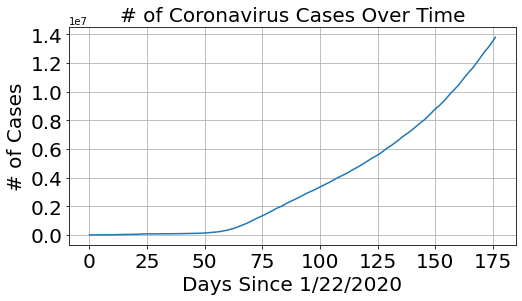

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()
#1e7 means 10 raised to 7

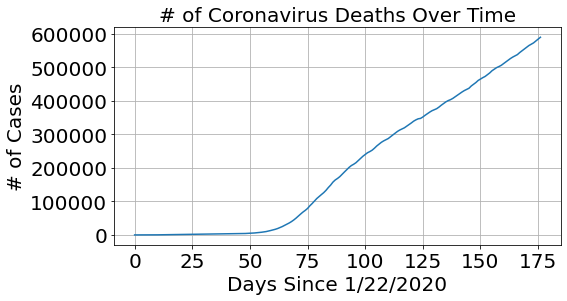

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

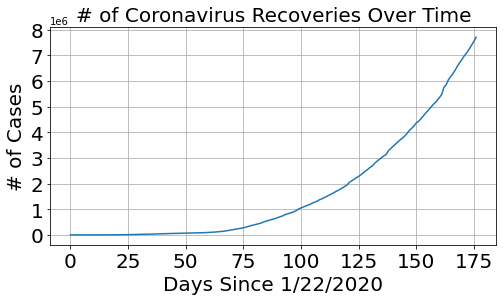

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

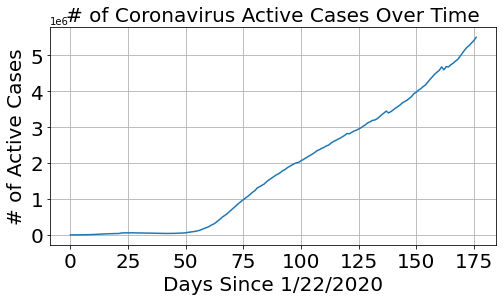

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Active Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

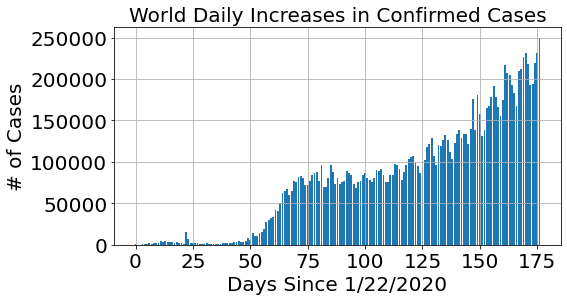

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

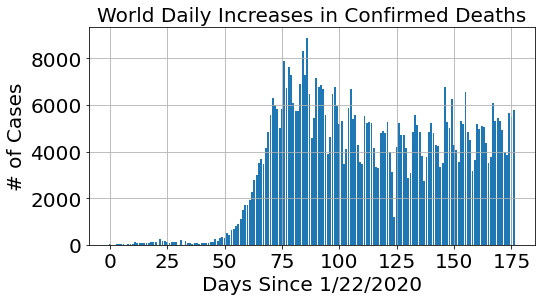

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

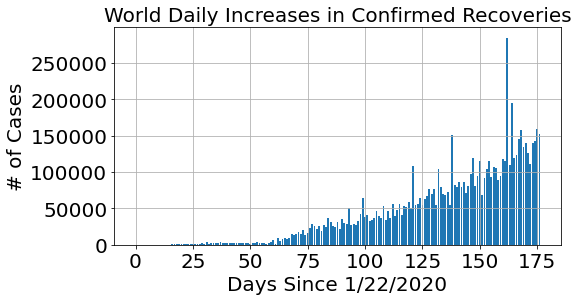

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

# **Log graphs**

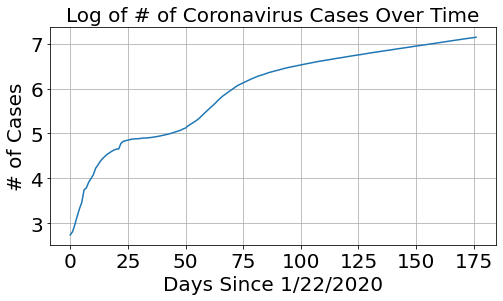

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

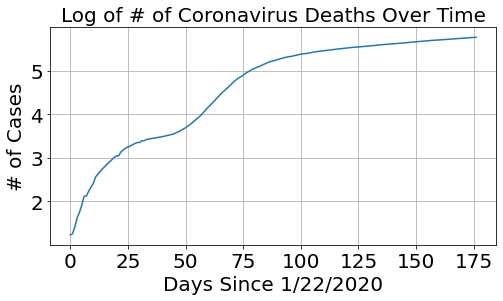

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

# **Country-wise Graphs**

In [ ]:
def country_plot(x, y, country, title):
    plt.figure(figsize=(8, 4))
    plt.bar(x,y)
    plt.title('{} {}'.format(country,title), size=30)
    plt.xlabel('Days Since 1/22/2020', size=20)
    plt.ylabel('# of Cases', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.grid()
    plt.show()

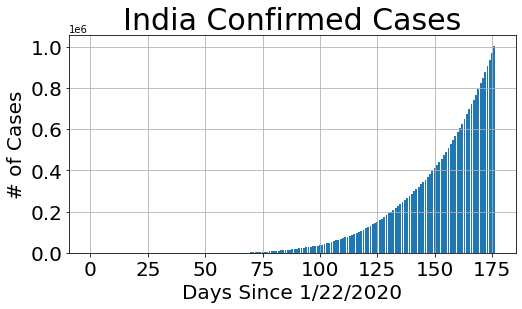

In [ ]:
country_plot(adjusted_dates, india_cases, 'India', 'Confirmed Cases')

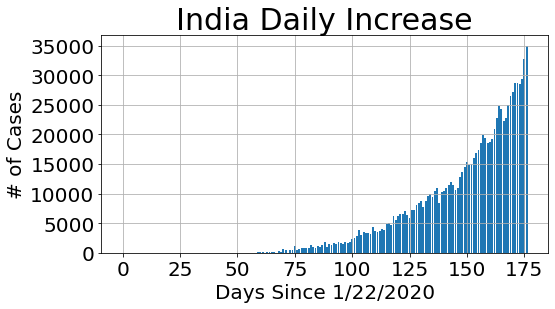

In [ ]:
country_plot(adjusted_dates, india_daily_increase, 'India', 'Daily Increase')

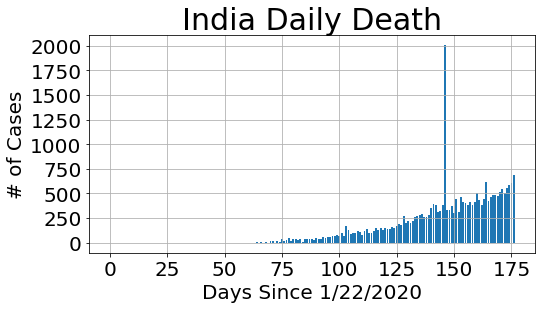

In [ ]:
country_plot(adjusted_dates, india_daily_death, 'India', 'Daily Death')

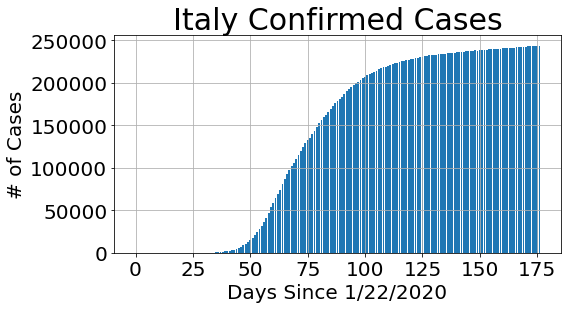

In [ ]:
country_plot(adjusted_dates, italy_cases, 'Italy', 'Confirmed Cases')

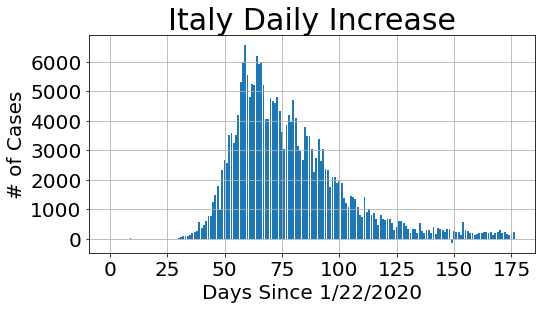

In [ ]:
country_plot(adjusted_dates, italy_daily_increase, 'Italy', 'Daily Increase')

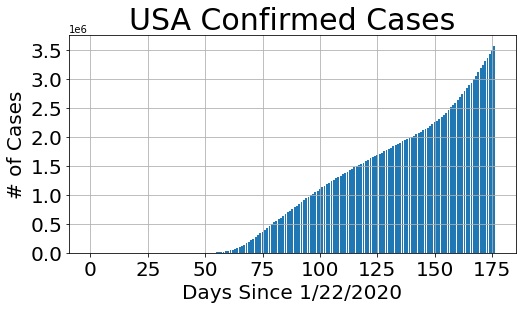

In [ ]:
country_plot(adjusted_dates, us_cases, 'USA', 'Confirmed Cases')

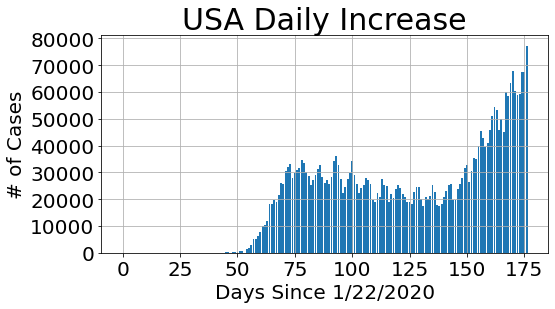

In [ ]:
country_plot(adjusted_dates, us_daily_increase, 'USA', 'Daily Increase')

# **Multiple plots in one graph**

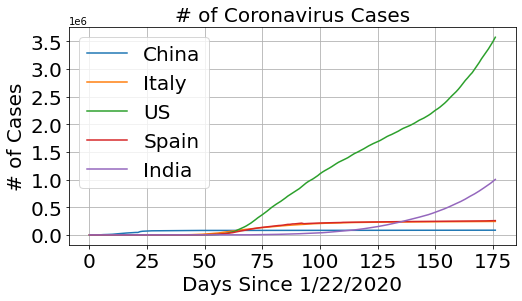

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('# of Coronavirus Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['China', 'Italy', 'US', 'Spain', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()